In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate

sns.set()
ratings = pd.read_table('data/data.txt', header = None, names = ['user', 'movie', 'rating'])
headers = ['Id','Title', 'Unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 
           'Crime','Documentary', 'Drama', 'Fantasy', 'Noir', 'Horror', 'Musical', 'Mystery', 
           'Romance', 'Scifi', 'Thriller', 'War', 'Western']
movies = pd.read_table('data/movies3.txt', header = None, names = headers)
movies.index = movies.index + 1

test = pd.read_table('data/test.txt', header = None, names = ['user', 'movie', 'rating'])
train = pd.read_table('data/train.txt', header = None, names = ['user', 'movie', 'rating'])



Documentation for SVD: 
http://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD

In [88]:
import surprise
from surprise import accuracy
pkf = surprise.model_selection.PredefinedKFold()
reader = Reader(rating_scale=(1, 5))

fulldata = Dataset.load_from_folds([('data/train.txt','data/test.txt')],reader)

algo = SVD(n_factors = 20, n_epochs = 30, biased = True)

for trainset, testset in pkf.split(fulldata):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    accuracy.rmse(predictions, verbose=True)
    

RMSE: 0.9249


In [89]:
np.shape(algo.pu)

(943, 20)

In [90]:
np.shape(algo.qi)

(1668, 20)

In [91]:
np.shape(algo.bu)

(943,)

In [92]:
np.shape(algo.bi)

(1668,)

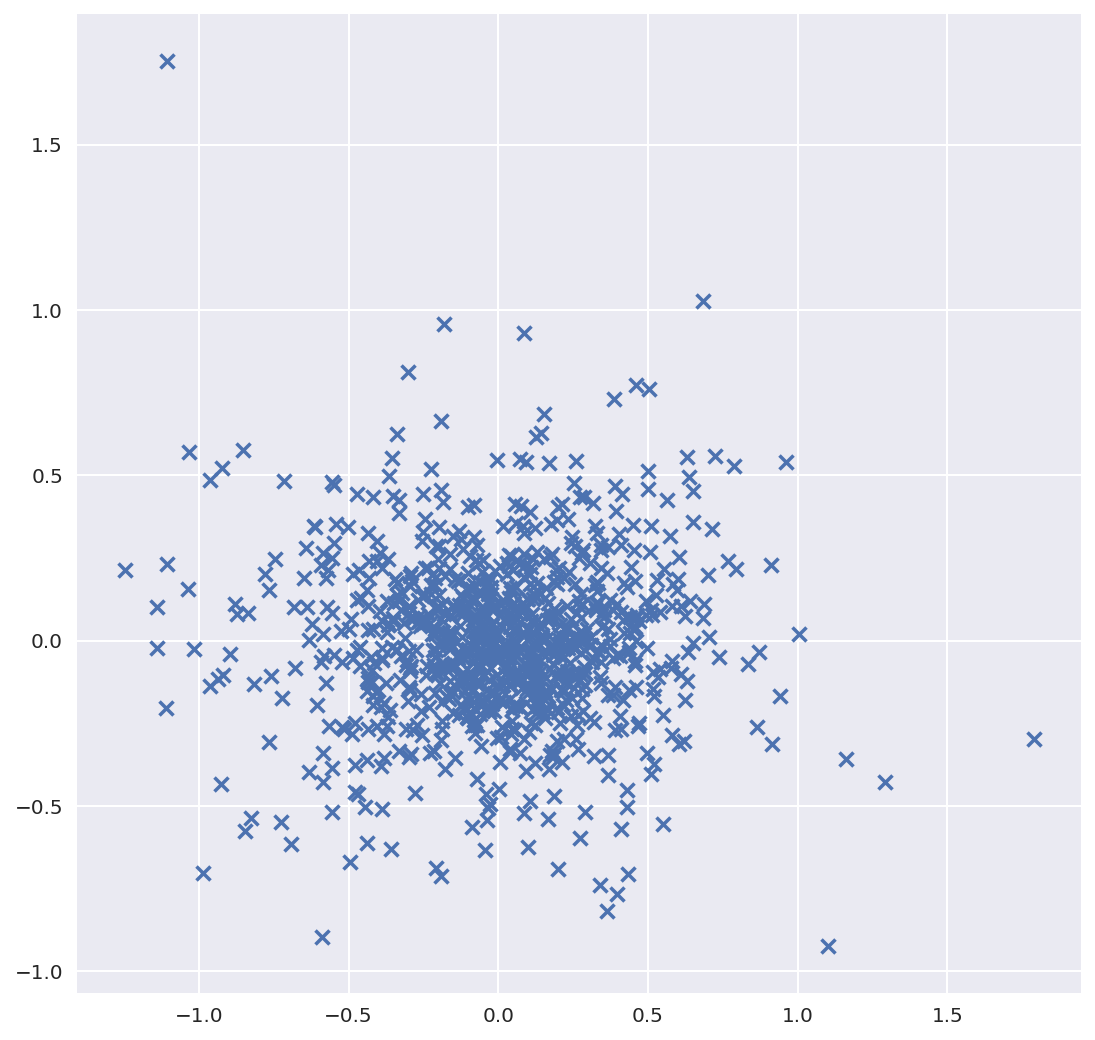

In [103]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(algo.pu)
upca = pca.transform(algo.pu)

plt.figure( figsize  = (9,9))
plt.scatter(algo.pu[:,0], algo.pu[:,1], marker= 'x', s =25,color = 'red', alpha = 0.5)
plt.scatter(algo.qi[:,0], algo.qi[:,1], marker= 'o', s =6, color = 'blue', alpha = 0.5)
plt.xlabel('Thing')

#plt.scatter(h2_pca[:,0],h2_pca[:,1],  alpha = 0.25, c=['black' if x==0 else 'green' for x in hpred], marker= '.')
plt.show()

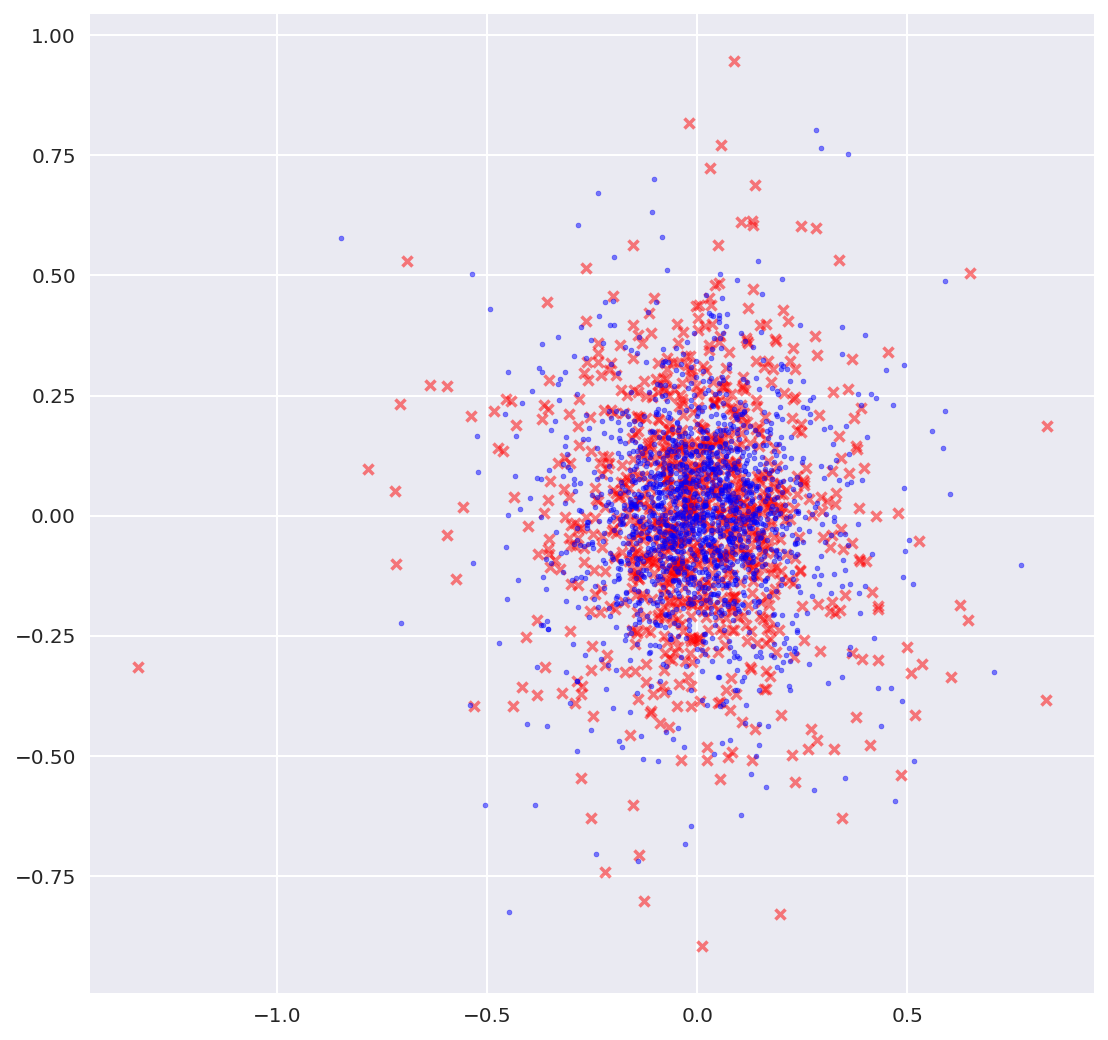